In [70]:
import os
from skimage import io
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import shutil
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [71]:
batch_size = 32
img_height = 300
img_width = 200

In [106]:
num_classes = 3
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [107]:
new_model = tf.keras.models.load_model('../Capstone3/mymodel_25/')

# Check its architecture
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 300, 200, 3)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 300, 200, 32)      4736      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 150, 100, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 150, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 75, 50, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 75, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 37, 25, 128)     

In [93]:
def get_model_name():
    import time
    run=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return run

In [108]:
recall=tf.keras.metrics.Recall(class_id=None)

In [109]:
root_logdir=os.path.join(os.curdir, 'my_logs')

In [110]:
def get_run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [111]:
run_logdir=get_run_logdir()

In [112]:
model_name=get_model_name()

In [113]:
model_name

'run_2021_01_09-14_04_58'

In [114]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-5 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 30 epochs"
        patience=30,
        verbose=1,), 
    keras.callbacks.TensorBoard(run_logdir,
                              histogram_freq=2,
                              write_graph=True,
                              write_images=True),
    keras.callbacks.ModelCheckpoint(filepath='models/'+model_name ,save_best_only=True)]

In [115]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=False)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator()

In [116]:
train_generator = train_datagen.flow_from_directory(
        'plants/train',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'plants/val',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')

Found 1968 images belonging to 3 classes.
Found 422 images belonging to 3 classes.


In [117]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[recall])

In [118]:
epochs=200
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
    callbacks=[callbacks])

Epoch 1/200
62/62 [==============================] - 118s 2s/step - loss: 0.9139 - recall_5: 0.6260 - val_loss: 0.7930 - val_recall_5: 0.7085
Epoch 2/200
62/62 [==============================] - 113s 2s/step - loss: 0.7956 - recall_5: 0.6982 - val_loss: 0.8036 - val_recall_5: 0.6896
Epoch 3/200
62/62 [==============================] - 117s 2s/step - loss: 0.8006 - recall_5: 0.6865 - val_loss: 0.7899 - val_recall_5: 0.6943
Epoch 4/200
62/62 [==============================] - 113s 2s/step - loss: 0.7739 - recall_5: 0.6738 - val_loss: 0.7963 - val_recall_5: 0.6991
Epoch 5/200
62/62 [==============================] - 116s 2s/step - loss: 0.7652 - recall_5: 0.6733 - val_loss: 0.7533 - val_recall_5: 0.6848
Epoch 6/200
62/62 [==============================] - 113s 2s/step - loss: 0.7471 - recall_5: 0.6728 - val_loss: 0.7821 - val_recall_5: 0.6398
Epoch 7/200
62/62 [==============================] - 116s 2s/step - loss: 0.7505 - recall_5: 0.6575 - val_loss: 0.7306 - val_recall_5: 0.6801
Epoch 

Epoch 43/200
62/62 [==============================] - 159s 3s/step - loss: 0.5373 - recall_5: 0.7647 - val_loss: 0.6023 - val_recall_5: 0.7393
Epoch 44/200
62/62 [==============================] - 156s 3s/step - loss: 0.5265 - recall_5: 0.7693 - val_loss: 0.5980 - val_recall_5: 0.7536
Epoch 45/200
62/62 [==============================] - 173s 3s/step - loss: 0.5288 - recall_5: 0.7693 - val_loss: 0.6291 - val_recall_5: 0.7156
Epoch 46/200
62/62 [==============================] - 176s 3s/step - loss: 0.5333 - recall_5: 0.7607 - val_loss: 0.5600 - val_recall_5: 0.7654
Epoch 47/200
62/62 [==============================] - 165s 3s/step - loss: 0.5324 - recall_5: 0.7698 - val_loss: 0.5735 - val_recall_5: 0.7559
Epoch 48/200
62/62 [==============================] - 173s 3s/step - loss: 0.5137 - recall_5: 0.7678 - val_loss: 0.6279 - val_recall_5: 0.7654
Epoch 49/200
62/62 [==============================] - 151s 2s/step - loss: 0.5150 - recall_5: 0.7708 - val_loss: 0.5804 - val_recall_5: 0.7370

In [35]:
mkdir graphs

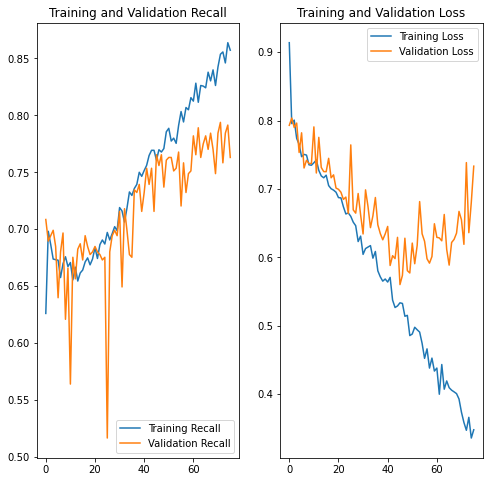

In [120]:
acc = history.history['recall_5']
val_acc = history.history['val_recall_5']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('graphs/simplemodel128.png', bbox_inches='tight')
plt.show()

In [121]:
test_generator = test_datagen.flow_from_directory(
        'plants/test',
        target_size=(300, 200),
        batch_size=16,
        shuffle=False,
        class_mode='categorical')

Found 424 images belonging to 3 classes.


In [122]:
ben_plants = os.listdir('plants/test/Benign_Plants')
ivy=os.listdir('plants/test/Poison_Ivy/')
oak=os.listdir('plants/test/Poison_Oak')

In [123]:
y_true=pd.DataFrame()
for i in range(len(ben_plants)):
    num=pd.Series([1,0,0])
    y_true= y_true.append(num, ignore_index=True)
for j in range(len(ivy)):
    num=pd.Series([0,1,0])
    y_true= y_true.append(num, ignore_index=True)
for k in range(len(oak)):
    num=pd.Series([0,0,1])
    y_true= y_true.append(num, ignore_index=True)

In [124]:
y_hat=(model.predict(test_generator, verbose=1))

27/27 [==============================] - 9s 317ms/step


In [125]:
y_hat

array([[0.04921537, 0.94257885, 0.00820571],
       [0.66351944, 0.29141128, 0.04506928],
       [0.92237586, 0.04769613, 0.02992795],
       ...,
       [0.0023873 , 0.8816462 , 0.11596654],
       [0.25065768, 0.20012851, 0.54921377],
       [0.46000773, 0.34097964, 0.19901265]], dtype=float32)

In [126]:
y_pred=np.argmax(y_hat, axis=1)
y_s=np.argmax(np.array(y_true), axis=1)

In [127]:
c_mat=confusion_matrix(y_s, y_pred)

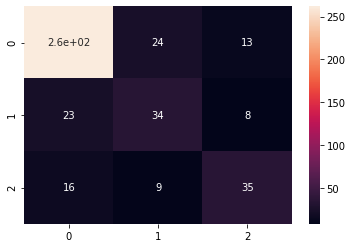

In [128]:
sns.heatmap(c_mat, annot=True)

In [129]:
percent=(c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)

In [130]:
c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))

array([[0.87625418, 0.08026756, 0.04347826],
       [0.35384615, 0.52307692, 0.12307692],
       [0.26666667, 0.15      , 0.58333333]])

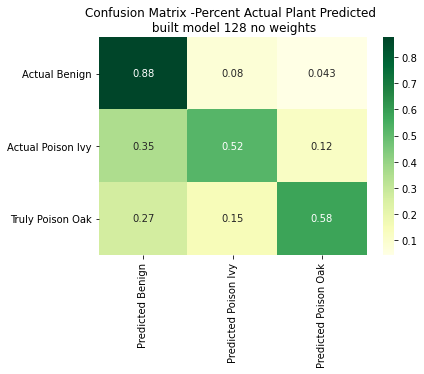

In [131]:
predicted_cat=['Predicted Benign', 'Predicted Poison Ivy', 'Predicted Poison Oak']
real_cat=['Actual Benign', 'Actual Poison Ivy', 'Truly Poison Oak']
sns.heatmap(percent, annot=percent, cmap='YlGn', 
            xticklabels=predicted_cat, 
            yticklabels=real_cat).set_title('Confusion Matrix -Percent Actual Plant Predicted \n built model 128 no weights');
plt.savefig('graphs/simplemodel128_2.png', bbox_inches='tight')

In [61]:
from skimage.transform import resize, rotate

In [88]:
test_data = io.imread('flask/static/uploads/'+'79.jpeg')
test_data=resize(test_data,(300,200,3))
# Load model
#new_model = tf.keras.models.load_model('models/run_2021_01_09-11_39_31epoch_18/')
# Predict on user input
prediction =  model.predict(np.array(test_data).reshape(1,300,200,3)).flatten()

In [ ]:
prediction=

In [89]:
prediction

array([9.5870060e-01, 1.4188782e-04, 4.1157473e-02], dtype=float32)

In [86]:
test_data = io.imread('flask/static/uploads/'+'79.jpeg')
test_data=resize(test_data,(300,200,3))
# Load model
new_model = tf.keras.models.load_model('models/run_2021_01_09-11_39_31epoch_18/')
# Predict on user input
prediction = new_model.predict(np.array(test_data).reshape(1,300,200,3)).flatten()

In [87]:
prediction

array([9.463033e-01, 5.845858e-04, 5.311215e-02], dtype=float32)

In [105]:
# predicting on new picitures
img = keras.preprocessing.image.load_img(
    'flask/static/uploads/'+'11.jpeg', target_size=(300, 200))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predicted_cat[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Predicted Poison Ivy with a 33.83 percent confidence.
